<a href="https://colab.research.google.com/github/saishshinde15/Sentiment_analysis/blob/main/Sntiment_analysis_4classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('Corona_NLP_train.csv', encoding='latin1')

In [3]:
dataset

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [4]:
dataset=dataset.drop(['UserName'	,'ScreenName'	,'Location'	,'TweetAt'],axis=1)

In [5]:
dataset

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [6]:
dataset.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [7]:
dataset['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [8]:
X=dataset['OriginalTweet']

In [9]:
X

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me, ready to go at supermarket during the #COV...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know itÂs getting tough when @KameronWild...
41155    Is it wrong that the smell of hand sanitizer i...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

In [10]:
y=dataset['Sentiment']

In [11]:
y

0                   Neutral
1                  Positive
2                  Positive
3                  Positive
4        Extremely Negative
                ...        
41152               Neutral
41153    Extremely Negative
41154              Positive
41155               Neutral
41156              Negative
Name: Sentiment, Length: 41157, dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
y[2]

4

In [14]:
X_input_train,X_input_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## analyzer='word'

In [15]:
vectorizer=CountVectorizer(analyzer='word')

In [16]:
X_train=vectorizer.fit_transform(X_input_train)
X_test=vectorizer.transform(X_input_test)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr=LogisticRegression(max_iter=4000)

In [19]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

In [33]:
lr_test=lr.score(X_test,y_test)


In [34]:
lr_test

0.6141885325558795

In [21]:
y_pred=lr.predict(X_test)

In [22]:

from sklearn.metrics import confusion_matrix



In [23]:
cm = confusion_matrix(y_test ,y_pred)
cm

array([[ 641,   15,  367,   40,   38],
       [   8,  811,   36,   31,  428],
       [ 230,   45, 1123,  282,  311],
       [  18,   19,  176, 1133,  237],
       [  36,  292,  302,  265, 1348]])

In [24]:


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.58      0.63      1101
           1       0.69      0.62      0.65      1314
           2       0.56      0.56      0.56      1991
           3       0.65      0.72      0.68      1583
           4       0.57      0.60      0.59      2243

    accuracy                           0.61      8232
   macro avg       0.63      0.62      0.62      8232
weighted avg       0.62      0.61      0.61      8232



In [25]:
lr.coef_

array([[-1.28649451e-01,  8.71352574e-02, -6.34890777e-04, ...,
        -1.17071369e-03,  2.52718902e-02, -2.41232575e-03],
       [ 2.51174749e-01, -3.89044561e-02, -6.71193710e-02, ...,
        -8.60005607e-04, -4.78970123e-05, -1.13285819e-03],
       [ 1.37150192e-01, -1.38162966e-01, -7.49057989e-03, ...,
        -5.08070283e-02, -2.42999571e-02, -1.59722723e-02],
       [-1.14032020e-02,  5.64752555e-02, -9.17115249e-04, ...,
         1.19532465e-01, -5.08741444e-04,  4.65057187e-02],
       [-2.48272288e-01,  3.34569094e-02,  7.61619570e-02, ...,
        -6.66947174e-02, -4.15294570e-04, -2.69882625e-02]])

(array([2.0000e+00, 3.0000e+00, 8.0000e+00, 9.0000e+00, 1.2000e+01,
        1.4000e+01, 2.4000e+01, 5.7000e+01, 9.6000e+01, 2.4300e+02,
        5.9800e+02, 1.4340e+03, 4.2160e+03, 1.4871e+04, 2.5546e+04,
        8.9930e+03, 7.2960e+03, 3.0870e+03, 1.2570e+03, 4.7500e+02,
        1.8600e+02, 1.0800e+02, 5.5000e+01, 3.2000e+01, 1.2000e+01,
        9.0000e+00, 5.0000e+00, 5.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-1.71743024, -1.60011195, -1.48279366, -1.36547536, -1.24815707,
        -1.13083878, -1.01352049, -0.8962022 , -0.7788839 , -0.66156561,
        -0.54424732, -0.42692903, -0.30961074, -0.19229245, -0.07497415,
         0.04234414,  0.15966243,  0.27698072,  0.39429901,  0.51161731,
         0.6289356 ,  0.74625389,  0.86357218,  0.98089047,  1.09820877,
         1.21552706,  1.33284535,  1.45016364,  1.56748193,  1.68480023,
         1.80211852]),
 <BarContainer object of 30 artists>)

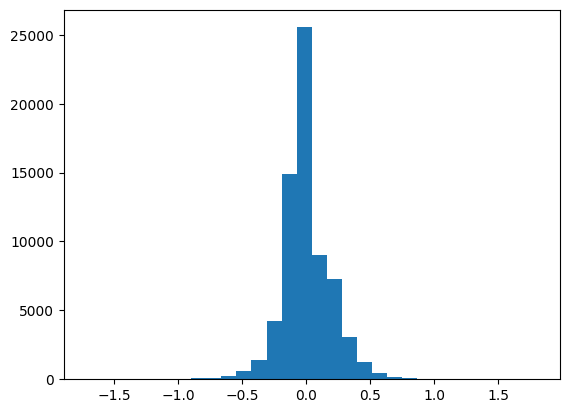

In [26]:
plt.hist(lr.coef_[4], bins =30)

In [27]:
word_index_map=vectorizer.vocabulary_

In [30]:
threshold = 0.7

print("Most positive words:")
for word, index in word_index_map.items():
    weight = lr.coef_[4][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
thank 1.0708014532192842
great 0.8267044776933722
hand 1.8021185173992584
tip 0.7017447699251649
easily 0.7524093710351796
please 0.952524851226655
like 1.2171697915509019
help 0.9667120176246501
special 1.294627272383784
safe 1.0891173402286063
better 1.0292362601849534
heroes 1.288022859642508
strong 1.0178578035740347
significant 0.7519646047376248
match 0.7186210804643473
worth 1.0433720888508764
nice 0.7493273676637782
best 0.9204579992735841
super 0.8175613339119927
protect 0.8392721501283684
straight 0.9956522296225963
good 1.0049862358914214
wow 0.992103590184975
growing 1.1721328219111957
increased 0.9897768899914565
certain 0.8401723349409405
yes 0.8266363128134047
care 0.9639068116196096
overwhelmed 0.9119369887262249
increase 1.0303664538877444
positive 1.6799557892584942
wired 0.7132122370337051
clear 0.709072973788289
free 1.158550955617887
united 0.8629150060788471
join 1.39571617823493
interesting 1.2717216372822449
lol 0.8195115594090782
ready 1.11

In [32]:
threshold = 0.7
print("Most negative words:")
for word, index in word_index_map.items():
    weight = lr.coef_[4][index]
    if weight < -threshold:
        print(word, weight)

Most negative words:
wtf -1.091848392483034
wrong -0.7698611954500236
worst -1.0387865863920693
selfish -0.7367623036641758
crisis -1.4153150723625736
warned -0.8839195908376609
crude -1.419806008008472
recession -1.1332022717575463
panic -0.8672285159220663
vote -0.7396915015494785
ashley -0.8416170816703464
handy -0.7989258851906789
worry -0.7897921820635829
ts -0.8056710690086931
sick -1.2116929452403273
shit -1.265361524107946
arabia -0.8242905607519164
horrible -0.8530089200600176
chaos -1.4789738357571334
fear -1.0994691059045494
hurt -1.3840603712413542
struggles -0.7521483824956304
death -1.2066040293386002
died -1.294774431792364
bad -0.7050565772991823
stupid -1.2561513000933406
sucks -1.0218495365679885
fuck -0.9395503084907142
depression -0.9699384835950868
die -0.8458622099083349
war -1.5186231816171805
acting -0.7119142777439106
fights -0.7045599248583065
wealth -0.8355743422174209
fake -0.9226000776815598
sad -0.835975705632169
unemployment -1.0210809968294443
lockdownuk

model 2

In [35]:
vectorizer=CountVectorizer(analyzer='word')

In [36]:
X_train=vectorizer.fit_transform(X_input_train)
X_test=vectorizer.transform(X_input_test)

In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
nb=MultinomialNB()

In [39]:
nb.fit(X_train,y_train)

MultinomialNB()

In [42]:
nb_test=nb.score(X_test,y_test)

In [43]:
nb_test

0.45626822157434405

In [44]:
y_pred1=nb.predict(X_test)

In [45]:
cm = confusion_matrix(y_test ,y_pred1)
cm

array([[ 261,    7,  646,   13,  174],
       [   3,  368,   71,    5,  867],
       [  74,   33, 1075,   57,  752],
       [  15,   41,  343,  428,  756],
       [   2,  138,  416,   63, 1624]])

In [46]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.74      0.24      0.36      1101
           1       0.63      0.28      0.39      1314
           2       0.42      0.54      0.47      1991
           3       0.76      0.27      0.40      1583
           4       0.39      0.72      0.51      2243

    accuracy                           0.46      8232
   macro avg       0.59      0.41      0.42      8232
weighted avg       0.55      0.46      0.44      8232



In [48]:
model_result=(['Lr_count_vector_word',lr_test],
              ['Nb_count_vector_word',nb_test])

In [49]:
model_result

(['Lr_count_vector_word', 0.6141885325558795],
 ['Nb_count_vector_word', 0.45626822157434405])

In [50]:
nb.feature_log_prob_

array([[ -9.90573503,  -8.20928574, -12.3036303 , ..., -12.3036303 ,
        -11.61048312, -12.3036303 ],
       [ -9.74037237,  -8.24372995, -12.44842257, ..., -12.44842257,
        -12.44842257, -12.44842257],
       [ -9.44120444,  -8.08536929, -12.66008027, ..., -12.66008027,
        -12.66008027, -12.66008027],
       [ -9.333745  ,  -8.07349136, -12.27818398, ..., -11.17957169,
        -12.27818398, -11.5850368 ],
       [ -9.69482949,  -7.85139801, -12.09272476, ..., -12.78587194,
        -12.78587194, -12.78587194]])

(array([4.0363e+04, 0.0000e+00, 1.8607e+04, 2.8990e+03, 1.4180e+03,
        1.4730e+03, 7.7100e+02, 6.6700e+02, 5.2800e+02, 4.7300e+02,
        3.5300e+02, 2.9400e+02, 1.8900e+02, 1.6400e+02, 1.0600e+02,
        9.1000e+01, 6.7000e+01, 5.1000e+01, 4.2000e+01, 1.6000e+01,
        1.9000e+01, 1.8000e+01, 1.6000e+01, 1.0000e+01, 6.0000e+00,
        5.0000e+00, 2.0000e+00, 5.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-12.78587194, -12.47794009, -12.17000824, -11.86207639,
        -11.55414454, -11.24621268, -10.93828083, -10.63034898,
        -10.32241713, -10.01448528,  -9.70655343,  -9.39862158,
         -9.09068972,  -8.78275787,  -8.47482602,  -8.16689417,
         -7.85896232,  -7.55103047,  -7.24309862,  -6.93516677,
         -6.62723491,  -6.31930306,  -6.01137121,  -5.70343936,
         -5.39550751,  -5.08757566,  -4.77964381,  -4.47171196,
         -4.1637801 ,  -3.85584825,  -3.5479164 ]),
 <BarContainer object of 30 artists>)

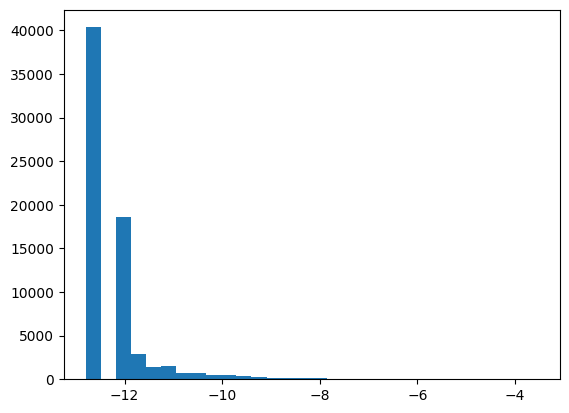

In [57]:
plt.hist(nb.feature_log_prob_[4], bins =30)

In [58]:
word_index_map=vectorizer.vocabulary_

In [62]:
threshold = -8. #-12

print("Most positive words:")
for word, index in word_index_map.items():
    weight = nb.feature_log_prob_[4][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
at -5.289774595422838
and -4.169376548108694
here -6.626776552106861
more -6.085140831050984
economy -7.926059536237122
https -4.182501052941504
co -4.1775591558150715
thank -7.347792631675598
you -4.997245874973762
for -4.6537531676429875
the -3.547916401589637
delivery -6.9423275235674335
of -4.327155678941532
prices -5.37190165040835
as -5.487426839090647
we -5.387085665178845
can -5.87014849196748
still -7.082089465942593
shop -7.369771538394374
while -7.158250826908157
some -6.583336423410871
into -7.165471074881644
my -5.945325411310106
store -5.368291538184249
with -5.469988436089008
is -4.884864888606374
people -5.7117551244014315
this -5.308267697401205
time -6.514883508740494
to -3.6917283630251223
your -5.756784376449132
grocery -5.425767967609642
coronacrisis -7.926059536237122
hand -6.284582270058404
sanitizer -6.263779142428642
oil -7.191160560996955
via -7.172743834210723
amazon -7.748919338185164
covid2019 -6.830034571133963
covid_19 -6.227674137786

In [64]:
threshold = -8
print("Most negative words:")
for word, index in word_index_map.items():
    weight = nb.feature_log_prob_[4][index]
    if weight < -threshold:
        print(word, weight)

Streaming output truncated to the last 5000 lines.
hoards -12.785871940598794
bg3mtllecl -12.785871940598794
lixey -12.785871940598794
peouphmvja -12.785871940598794
itvpresscentre -12.785871940598794
bbcpress -12.785871940598794
c4press -12.785871940598794
channel5press -12.785871940598794
utahâ -12.092724760038848
lunds -12.092724760038848
sculpture -12.092724760038848
j6hz8omt7r -12.092724760038848
uzj6wt4ljb -12.092724760038848
jxfsqge9ei -12.092724760038848
coronacrunch -12.092724760038848
faresharebh -12.092724760038848
isoation -12.092724760038848
hungryathome -12.092724760038848
qjknvy0b2m -12.092724760038848
jtijzik5ue -12.092724760038848
multivitamins -12.785871940598794
21stcentury -12.785871940598794
thisislife -12.785871940598794
vd20a3df5q -12.785871940598794
ebwdkppowh -12.785871940598794
objectionable -12.785871940598794
smdhealthunit -12.785871940598794
aj7tmjl8me -12.785871940598794
getwoke -12.092724760038848
getsubscribed -12.092724760038848
um3wjiklxx -12.092724760

# model 3

In [65]:
vectorizer=TfidfVectorizer(analyzer='word')

In [66]:
X_train=vectorizer.fit_transform(X_input_train)
X_test=vectorizer.transform(X_input_test)

In [69]:
lr1=LogisticRegression(max_iter=4000)

In [70]:
lr1.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

In [73]:
lr1_test=lr1.score(X_test,y_test)

In [74]:
model_result=(['Lr_count_vector_word',lr_test],
              ['Nb_count_vector_word',nb_test],
              ['Lr_tfidf_word',lr1_test])

In [76]:
model_result

(['Lr_count_vector_word', 0.6141885325558795],
 ['Nb_count_vector_word', 0.45626822157434405],
 ['Lr_tfidf_word', 0.5657191448007775])

In [77]:
y_pred2=lr1.predict(X_test)

In [78]:
cm=confusion_matrix(y_test,y_pred2)
cm

array([[ 542,   16,  437,   42,   64],
       [   7,  690,   36,   34,  547],
       [ 216,   49, 1067,  236,  423],
       [  22,   21,  207,  993,  340],
       [  50,  279,  315,  234, 1365]])

In [79]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.65      0.49      0.56      1101
           1       0.65      0.53      0.58      1314
           2       0.52      0.54      0.53      1991
           3       0.65      0.63      0.64      1583
           4       0.50      0.61      0.55      2243

    accuracy                           0.57      8232
   macro avg       0.59      0.56      0.57      8232
weighted avg       0.58      0.57      0.57      8232



In [81]:
lr1.coef_

array([[-0.14217036,  0.24760072, -0.01346996, ..., -0.01417983,
         0.11086525, -0.00780873],
       [ 0.19667229, -0.08997004, -0.05267065, ..., -0.01377215,
        -0.00696144, -0.00822543],
       [ 0.26256888, -0.41176616, -0.03461981, ..., -0.05344379,
        -0.04808045, -0.0228239 ],
       [ 0.05408127,  0.08729938, -0.01619364, ...,  0.13341378,
        -0.03576575,  0.06630408],
       [-0.37115209,  0.16683611,  0.11695406, ..., -0.052018  ,
        -0.02005761, -0.02744602]])

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 3.0000e+00, 8.0000e+00, 9.0000e+00, 1.8000e+01,
        5.1000e+01, 1.9500e+02, 1.1280e+03, 4.2557e+04, 2.2027e+04,
        2.1760e+03, 3.4600e+02, 6.9000e+01, 2.6000e+01, 2.2000e+01,
        3.0000e+00, 8.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-4.47965436, -4.16095311, -3.84225187, -3.52355063, -3.20484939,
        -2.88614815, -2.5674469 , -2.24874566, -1.93004442, -1.61134318,
        -1.29264194, -0.9739407 , -0.65523945, -0.33653821, -0.01783697,
         0.30086427,  0.61956551,  0.93826676,  1.256968  ,  1.57566924,
         1.89437048,  2.21307172,  2.53177296,  2.85047421,  3.16917545,
         3.48787669,  3.80657793,  4.12527917,  4.44398042,  4.76268166,
         5.0813829 ]),
 <BarContainer object of 30 artists>)

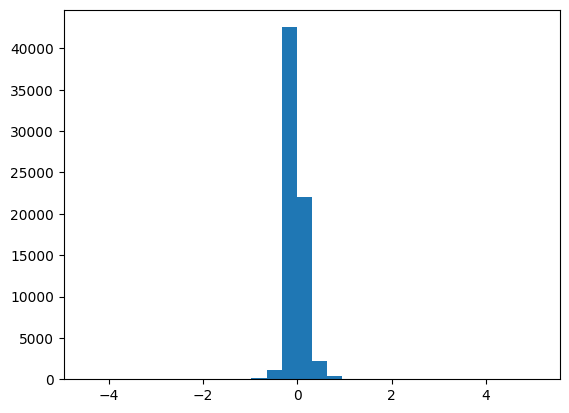

In [82]:
plt.hist(lr1.coef_[4], bins= 30)

In [83]:
word_index_map=vectorizer.vocabulary_

In [84]:
threshold = 1


print("Most positive words:")
for word, index in word_index_map.items():
    weight = lr1.coef_[4][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
thank 1.7030177790343672
grocery 1.1909126585164964
hand 5.0813828986426035
sanitizer 1.1924174822790055
amazon 1.2019145732842962
tip 1.1678542707412958
please 2.714942525033999
like 4.397205711667487
data 1.1093732030845713
help 2.8818508211106866
special 1.6398303120448894
safe 2.4152649727154922
better 1.7826981616222441
heroes 1.7479508851688892
significant 1.0865210620365149
worth 1.6553733071053922
protect 1.4735062603279951
yourself 1.2672459264326073
straight 1.310682138065359
good 2.3972064199988385
meeting 1.0650048755791826
growing 1.7747465410942025
increased 2.8002876873536646
certain 1.360844060790697
yes 1.3192002380910735
care 1.3187539298570725
want 2.3969845330809156
increase 2.3105006792228022
positive 3.017919714136484
free 1.8387598561398808
united 1.2908421682466769
join 2.102579098391163
interesting 2.4223527281988884
lol 1.1176097099872753
ready 1.8874687871024924
support 2.0057463384747325
important 1.690258686282401
growth 1.5079977850525

In [85]:
print("Most negative words:")
for word, index in word_index_map.items():
    weight = lr1.coef_[2][index]
    if weight < -threshold:
        print(word, weight)

Most negative words:
vs -1.0187477179647413
thank -1.7184129971272066
great -3.4138370310144666
hand -3.6828671653865457
grateful -1.1596842852450417
easy -1.3260834271604405
please -1.4514399710336703
like -1.8336718719183736
help -3.050469647957273
special -1.859684743147944
safe -2.6748146601369127
better -2.3551998753075627
heroes -1.7895793059913765
least -1.3356351253358418
strong -1.7390946741648843
nice -1.384586370734104
best -3.364036902012242
good -2.7748752567529724
wow -1.5797293972652162
effective -1.0972257888012207
increased -1.1863373022735222
yes -1.4190615939012639
care -1.7815636085472497
increase -1.6252182717920638
positive -2.0548772487384497
free -3.364264957782442
friends -1.4598196803942953
love -2.519279118223523
interesting -1.068625557258547
support -2.4241315464108
growth -1.0141676377433935
someone -1.1058257620938265
true -1.2442583601046848
vigilant -1.04361617359082
despite -1.0057294777885049
hope -1.1116107634422947
well -1.1983515660336967
interest 

# model 4

In [89]:
vectorizer=TfidfVectorizer(analyzer='word')

In [91]:
X_train=vectorizer.fit_transform(X_input_train)
X_test=vectorizer.transform(X_input_test)

In [92]:
nb1=MultinomialNB()

In [93]:
nb1.fit(X_train,y_train)

MultinomialNB()

In [95]:
nb1_test=nb1.score(X_test,y_test)

In [96]:
model_result=(['Lr_count_vector_word',lr_test],
              ['Nb_count_vector_word',nb_test],
              ['Lr_tfidf_word',lr1_test],
              ['Nb_tfidf_word',nb1_test])

In [98]:
model_result

(['Lr_count_vector_word', 0.6141885325558795],
 ['Nb_count_vector_word', 0.45626822157434405],
 ['Lr_tfidf_word', 0.5657191448007775],
 ['Nb_tfidf_word', 0.34839650145772594])

## Overall Nb is not making a good model at all,so from now lets only focus on Logistic Regression

## Lemmatization

In [104]:
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [105]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [106]:
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    words_and_tags = nltk.pos_tag(tokens)
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
            for word, tag in words_and_tags]

In [107]:
vectorizer=CountVectorizer(tokenizer=LemmaTokenizer())

In [108]:
X_train=vectorizer.fit_transform(X_input_train)
X_test=vectorizer.transform(X_input_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [113]:
lr2=LogisticRegression(max_iter=4000)

In [114]:
lr2.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

In [117]:
lr2_test=lr2.score(X_test,y_test)

In [118]:
y_pred3=lr2.predict(X_test)

In [119]:
model_result=(['Lr_count_vector_word',lr_test],
              ['Nb_count_vector_word',nb_test],
              ['Lr_tfidf_word',lr1_test],
              ['Nb_tfidf_word',nb1_test],
              ['lr_count_vector_Lemmatization',lr2_test])

In [120]:
model_result

(['Lr_count_vector_word', 0.6141885325558795],
 ['Nb_count_vector_word', 0.45626822157434405],
 ['Lr_tfidf_word', 0.5657191448007775],
 ['Nb_tfidf_word', 0.34839650145772594],
 ['lr_count_vector_Lemmatization', 0.6028911564625851])

In [122]:
cm=confusion_matrix(y_test,y_pred3)
cm

array([[ 649,    9,  361,   35,   47],
       [  10,  789,   32,   32,  451],
       [ 245,   53, 1084,  306,  303],
       [  22,   24,  198, 1101,  238],
       [  39,  272,  306,  286, 1340]])

In [123]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.67      0.59      0.63      1101
           1       0.69      0.60      0.64      1314
           2       0.55      0.54      0.55      1991
           3       0.63      0.70      0.66      1583
           4       0.56      0.60      0.58      2243

    accuracy                           0.60      8232
   macro avg       0.62      0.61      0.61      8232
weighted avg       0.61      0.60      0.60      8232



In [124]:
lr2.coef_

array([[ 7.56468902e-02, -9.58542475e-02, -1.20029237e-01, ...,
        -3.06877509e-02,  5.72252764e-02, -3.78622360e-03],
       [ 1.04451662e-01, -5.01718485e-02,  1.87399897e-02, ...,
        -4.99024403e-04, -3.76526745e-05, -2.93739147e-04],
       [-3.20243987e-02,  1.14715418e-02, -5.68585963e-02, ...,
         7.76461161e-02, -4.76460828e-02, -2.35639267e-02],
       [-9.99645676e-02,  1.30624965e-01,  6.85446555e-02, ...,
        -3.05260315e-02, -8.54127001e-03,  4.62422260e-02],
       [-4.81095856e-02,  3.92958957e-03,  8.96031878e-02, ...,
        -1.59333093e-02, -1.00027097e-03, -1.85983365e-02]])

(array([2.0000e+00, 4.0000e+00, 3.0000e+00, 5.0000e+00, 1.2000e+01,
        1.3000e+01, 2.1000e+01, 5.1000e+01, 9.5000e+01, 1.9700e+02,
        3.9400e+02, 9.8000e+02, 2.6520e+03, 7.9120e+03, 2.3887e+04,
        1.3897e+04, 8.9450e+03, 5.7610e+03, 2.5240e+03, 1.0290e+03,
        4.8000e+02, 1.8700e+02, 1.1200e+02, 4.8000e+01, 2.8000e+01,
        2.4000e+01, 7.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([-1.66056027, -1.55146416, -1.44236806, -1.33327195, -1.22417585,
        -1.11507975, -1.00598364, -0.89688754, -0.78779143, -0.67869533,
        -0.56959923, -0.46050312, -0.35140702, -0.24231092, -0.13321481,
        -0.02411871,  0.0849774 ,  0.1940735 ,  0.3031696 ,  0.41226571,
         0.52136181,  0.63045791,  0.73955402,  0.84865012,  0.95774623,
         1.06684233,  1.17593843,  1.28503454,  1.39413064,  1.50322675,
         1.61232285]),
 <BarContainer object of 30 artists>)

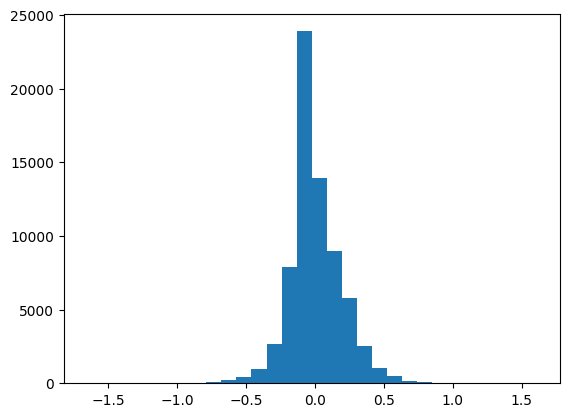

In [126]:
plt.hist(lr2.coef_[4], bins =30)

In [129]:
word_index_map=vectorizer.vocabulary_

In [130]:
threshold = 1

print("Most positive words:")
for word, index in word_index_map.items():
    weight = lr2.coef_[4][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
great 1.0695268775458917
hand 1.1505790850940694
like 1.1837771958863499
win 1.0307063603209299
special 1.2020519368550449
safe 1.0572943386175617
hero 1.081388526431994
strong 1.0794193276914732
support 1.1068327909442814
overwhelm 1.1449583497681775
positive 1.6123228492571327
play 1.1297315131404835
free 1.2163727186786848
united 1.209273312668403
friend 1.0205376050145734
interesting 1.0983295145677163
ready 1.1423691761355668
growth 1.093422307362615
create 1.163243269905127
vigilant 1.3780698447299906
praise 1.0878603330128251
profit 1.0643148061689542
wish 1.1953629826867223
wonât 1.0390418646828674
top 1.013510775160653
curious 1.0473432659352642
relief 1.0355095712071545
loud 1.0138218306817
acceptable 1.0807375533279615
wo 1.2022117869850077
thanks 1.3772459623226274
confidence 1.394440116300041
fresh 1.363228287112506
clearly 1.078644705181536
value 1.1247037156958244
dedicate 1.1507695582556174
calm 1.0523038849080493
adequate 1.0206504135369345
rich 1

In [132]:
print("Most negative words:")
for word, index in word_index_map.items():
    weight = lr2.coef_[4][index]
    if weight < -threshold:
        print(word, weight)

Most negative words:
wtf -1.1386530436416251
crisis -1.475308227340108
crude -1.453481164243276
recession -1.135204876976642
ashley -1.013351306317602
fail -1.2170120156528383
sick -1.069310219013776
shit -1.1360682792031143
chaos -1.4359853285784476
stupid -1.2071105504265864
fuck -1.1272003369540884
war -1.4815316200748314
collapse -1.1759780075436976
unemployment -1.0365297247586602
scam -1.6605602656197909
poor -1.488815352907641
stressful -1.00572884154453
kill -1.4117364599262028
worse -1.0759479929165492
hell -1.4320533504519748
panic-buying -1.033450604656417
suffer -1.210491004523622
dangerous -1.2188263813862255
threaten -1.0901090204195318
rude -1.0740339168307356
bitch -1.189400010905479
criminal -1.553412918319651
steal -1.1105820213820075
disaster -1.0862295899929708
fraud -1.3238330865735048
whitehouse -1.0966147601744183
piss -1.1570159423070576
asshole -1.0273248869557952
dead -1.1662762803388442
cancer -1.0354403353536699
bullshit -1.2757820729755391
scare -1.29477207

# Lemmatization model 2

In [133]:
vectorizer=TfidfVectorizer(tokenizer=LemmaTokenizer())

In [134]:
X_train=vectorizer.fit_transform(X_input_train)
X_test=vectorizer.transform(X_input_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [145]:
lr4=LogisticRegression(max_iter=4000)

In [146]:
lr4.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

In [147]:
lr4_test=lr4.score(X_test,y_test)

In [148]:
y_pred4=lr4.predict(X_test)

In [149]:
model_result=(['Lr_count_vector_word',lr_test],
              ['Nb_count_vector_word',nb_test],
              ['Lr_tfidf_word',lr1_test],
              ['Nb_tfidf_word',nb1_test],
              ['lr_count_vector_Lemmatization',lr2_test],
              ['Lr_tfidf_Lemmatization',lr4_test])

In [150]:
model_result

(['Lr_count_vector_word', 0.6141885325558795],
 ['Nb_count_vector_word', 0.45626822157434405],
 ['Lr_tfidf_word', 0.5657191448007775],
 ['Nb_tfidf_word', 0.34839650145772594],
 ['lr_count_vector_Lemmatization', 0.6028911564625851],
 ['Lr_tfidf_Lemmatization', 0.5657191448007775])

In [151]:
cm=confusion_matrix(y_test,y_pred4)

In [152]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.64      0.51      0.56      1101
           1       0.67      0.55      0.60      1314
           2       0.52      0.52      0.52      1991
           3       0.64      0.62      0.63      1583
           4       0.50      0.61      0.55      2243

    accuracy                           0.57      8232
   macro avg       0.59      0.56      0.57      8232
weighted avg       0.58      0.57      0.57      8232



In [153]:
lr4.coef_

array([[ 0.87211854, -0.92617908, -0.18018671, ..., -0.02172005,
         0.12140973, -0.01043408],
       [ 1.36206802,  0.29030874,  0.3350219 , ..., -0.01385228,
        -0.00567923, -0.00852345],
       [-0.37056561, -0.0738158 , -0.39456655, ...,  0.12289913,
        -0.05505431, -0.0262216 ],
       [-1.4477341 ,  0.64931052, -0.23279871, ..., -0.04611944,
        -0.04289267,  0.07306387],
       [-0.41588684,  0.06037562,  0.47253008, ..., -0.04120736,
        -0.01778351, -0.02788474]])

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 9.0000e+00, 6.0000e+00,
        1.4000e+01, 3.6000e+01, 1.0400e+02, 4.8300e+02, 4.0420e+03,
        5.0817e+04, 1.2813e+04, 6.9300e+02, 1.5800e+02, 4.1000e+01,
        2.5000e+01, 1.6000e+01, 3.0000e+00, 6.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-4.65951854, -4.35944654, -4.05937454, -3.75930254, -3.45923054,
        -3.15915853, -2.85908653, -2.55901453, -2.25894253, -1.95887053,
        -1.65879853, -1.35872652, -1.05865452, -0.75858252, -0.45851052,
        -0.15843852,  0.14163348,  0.44170549,  0.74177749,  1.04184949,
         1.34192149,  1.64199349,  1.94206549,  2.2421375 ,  2.5422095 ,
         2.8422815 ,  3.1423535 ,  3.4424255 ,  3.7424975 ,  4.04256951,
         4.34264151]),
 <BarContainer object of 30 artists>)

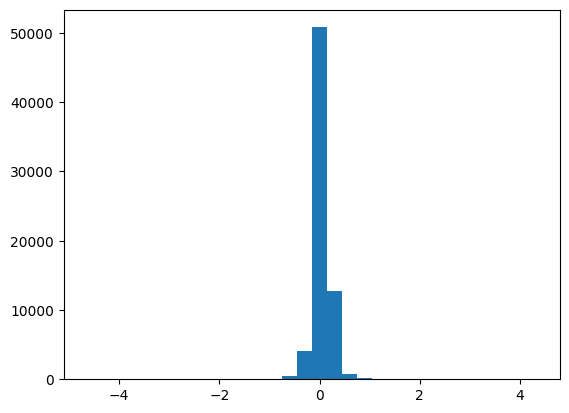

In [154]:
plt.hist(lr4.coef_[4],bins=30)

In [155]:
word_index_map=vectorizer.vocabulary_

In [156]:
threshold = 1

print("Most positive words:")
for word, index in word_index_map.items():
    weight = lr4.coef_[4][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
thank 1.4668955880165524
grocery 1.355011969052381
hand 4.130496266706671
sanitizer 1.5577009548617717
amazon 1.1532678053820888
easy 1.0128662924937781
please 2.804678224854114
like 4.3426415074039
data 1.081092014720299
check 1.0557854962472968
help 3.119518177719305
special 1.6934585082740325
safe 2.4097617845869665
good 1.9261255482179296
hero 1.5423816633845095
share 1.7531229165409954
significant 1.1759326696430998
meet 1.0961997902263945
driver 1.0931344643590235
worth 1.6259182331729702
detail 1.0355377734799842
protect 1.4276005883821592
yourself 1.359245568758458
straight 1.2423708770648738
support 2.291050924656659
increased 1.5428422086892288
certain 1.303708158416377
authority 1.1360734208595042
save 1.2966879533432785
yes 1.1113906039185357
care 1.0974102375074726
number 1.3992815023174974
overwhelm 1.2447574880519974
want 1.780141911549966
increase 2.125318195789499
positive 2.9959697957519733
stay 1.0103432083931756
play 1.7509638374306522
free 1.87

In [159]:
print("Most negative words:")
for word, index in word_index_map.items():
    weight = lr4.coef_[4][index]
    if weight < -threshold:
        print(word, weight)

Most negative words:
wtf -1.4193167873967234
wrong -1.5188898284084633
bad -2.023236476236944
but -1.1637705044775442
selfish -1.6126116484371282
crisis -4.659518542213274
crude -2.0389686134690135
recession -2.007262541660124
loss -1.1660038705979303
no -1.9003646655109212
panic -3.3459881865742247
stop -1.4040550450094025
drop -1.069423596984053
fail -1.7901291245288935
ban -1.2735635375588488
arrest -1.4889256288777766
shock -1.3210639126234798
sick -2.1067040093226477
shit -2.4651887617102544
youâre -1.2099230538655843
coronavirusupdate -1.0038685980185968
chaos -1.5135521264429068
sad -1.094735167511018
fear -1.9962592056654236
struggle -1.5795466772880447
death -1.717157356788996
soap -1.342775933177539
lick -1.1771498112806142
die -2.4696277417450436
stupid -1.6493340132197252
crazy -1.1172428004637693
seriously -1.0221384891242515
suck -1.0742926864735398
low -1.0877952121592063
fuck -2.2429151507112
problem -1.2311520513638408
war -2.2542290913623124
fake -1.3437194682415805


# PorterStemmer

In [160]:
class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    return [self.porter.stem(t) for t in tokens]

In [161]:
vectorizer=TfidfVectorizer(tokenizer=StemTokenizer())

In [163]:
X_train=vectorizer.fit_transform(X_input_train)
X_test=vectorizer.transform(X_input_test)

In [169]:
lr5=LogisticRegression(max_iter=4000)

In [170]:
lr5.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

In [171]:
lr5_test=lr5.score(X_test,y_test)

In [172]:
model_result=(['Lr_count_vector_word',lr_test],
              ['Nb_count_vector_word',nb_test],
              ['Lr_tfidf_word',lr1_test],
              ['Nb_tfidf_word',nb1_test],
              ['lr_count_vector_Lemmatization',lr2_test],
              ['Lr_tfidf_Lemmatization',lr4_test],
              ['lr_tfidf_PorterStemmer',lr5_test])

In [173]:
model_result

(['Lr_count_vector_word', 0.6141885325558795],
 ['Nb_count_vector_word', 0.45626822157434405],
 ['Lr_tfidf_word', 0.5657191448007775],
 ['Nb_tfidf_word', 0.34839650145772594],
 ['lr_count_vector_Lemmatization', 0.6028911564625851],
 ['Lr_tfidf_Lemmatization', 0.5657191448007775],
 ['lr_tfidf_PorterStemmer', 0.5672983479105929])

In [174]:
vectorizer=CountVectorizer(tokenizer=StemTokenizer())

In [177]:
X_train=vectorizer.fit_transform(X_input_train)
X_test=vectorizer.transform(X_input_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [178]:
lr6=LogisticRegression()

In [179]:
lr6.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [180]:
lr6_test=lr5.score(X_test,y_test)

In [181]:
model_result=(['Lr_count_vector_word',lr_test],
              ['Nb_count_vector_word',nb_test],
              ['Lr_tfidf_word',lr1_test],
              ['Nb_tfidf_word',nb1_test],
              ['lr_count_vector_Lemmatization',lr2_test],
              ['Lr_tfidf_Lemmatization',lr4_test],
              ['lr_tfidf_PorterStemmer',lr5_test],
              ['lr_count_vector_PorterStemmer',lr6_test])

In [183]:
model_result

(['Lr_count_vector_word', 0.6141885325558795],
 ['Nb_count_vector_word', 0.45626822157434405],
 ['Lr_tfidf_word', 0.5657191448007775],
 ['Nb_tfidf_word', 0.34839650145772594],
 ['lr_count_vector_Lemmatization', 0.6028911564625851],
 ['Lr_tfidf_Lemmatization', 0.5657191448007775],
 ['lr_tfidf_PorterStemmer', 0.5672983479105929],
 ['lr_count_vector_PorterStemmer', 0.43415937803692906])

In [184]:
y_pred5=lr5.predict(X_test)

In [185]:
lr5.coef_

array([[ 0.89583545, -0.85777103, -0.18197307, ..., -0.02120069,
         0.12497135, -0.01013391],
       [ 1.35901221,  0.26208476,  0.35935013, ..., -0.01235732,
        -0.00541478, -0.00854845],
       [-0.37405185, -0.05158072, -0.39066443, ...,  0.12404142,
        -0.0520746 , -0.02556956],
       [-1.46644173,  0.60136248, -0.301986  , ..., -0.05273452,
        -0.04916111,  0.07190888],
       [-0.41435409,  0.04590451,  0.51527337, ..., -0.03774888,
        -0.01832085, -0.02765696]])

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00, 1.1000e+01,
        1.0000e+01, 2.4000e+01, 7.2000e+01, 2.3400e+02, 9.9000e+02,
        4.1102e+04, 1.9975e+04, 2.1410e+03, 3.4800e+02, 9.8000e+01,
        3.5000e+01, 1.9000e+01, 1.0000e+01, 3.0000e+00, 4.0000e+00,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-4.67852168, -4.38703175, -4.09554181, -3.80405187, -3.51256193,
        -3.221072  , -2.92958206, -2.63809212, -2.34660219, -2.05511225,
        -1.76362231, -1.47213238, -1.18064244, -0.8891525 , -0.59766257,
        -0.30617263, -0.01468269,  0.27680724,  0.56829718,  0.85978712,
         1.15127705,  1.44276699,  1.73425693,  2.02574686,  2.3172368 ,
         2.60872674,  2.90021667,  3.19170661,  3.48319655,  3.77468649,
         4.06617642]),
 <BarContainer object of 30 artists>)

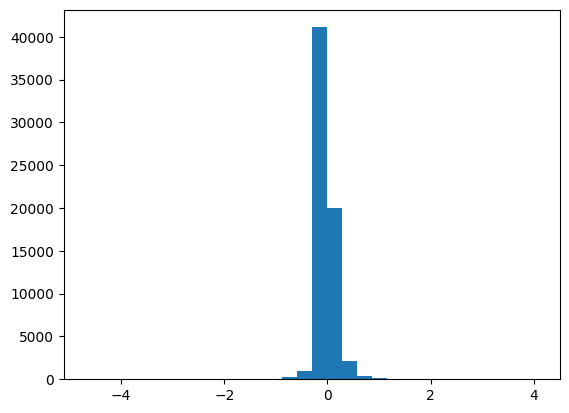

In [186]:
plt.hist(lr5.coef_[4],bins=30)

In [187]:
word_index_map = vectorizer.vocabulary_

In [188]:
threshold = 1

print("Most positive words:")
for word, index in word_index_map.items():
    weight = lr5.coef_[4][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
thank 2.822210105932651
groceri 1.3337686639254758
hand 4.066176421904771
sanit 1.510681407867624
amazon 1.1373010977823634
pleas 2.826541295611903
tell 1.1901810793367162
like 3.900108518249365
data 1.0946056108609314
check 1.0570618602282027
help 3.0756213342221064
special 1.6144693001199737
safe 2.540539241914407
better 1.7065894009060656
hero 1.499443608513451
share 1.7522370500587254
signific 1.0594270734683935
meet 1.096074716435258
worth 1.69633131405035
detail 1.0777352982791293
yourself 1.4677679205102114
straight 1.2293654469506554
good 1.5690592574319349
grow 1.3299790006243268
sure 1.4655158206953862
support 2.221960532767692
increas 2.376547101910917
certain 1.334295817335407
save 1.3306391931846515
ye 1.2445111553327044
care 1.2127593774859797
number 1.3736116942888408
overwhelm 1.3166845039863835
want 1.766645022108531
posit 2.992054261815068
play 1.711768747915668
free 1.9140224415747773
agre 1.1884412591531026
unit 1.0511475893673299
join 1.6796915

In [190]:
print("Most negative words:")
for word, index in word_index_map.items():
    weight = lr5.coef_[4][index]
    if weight < -threshold:
        print(word, weight)

Most negative words:
wtf -1.3612058857723333
wrong -1.4674691041442596
worst -1.5834564739148125
but -1.171872955519388
scare -1.071085290954298
selfish -1.7516859271265075
crisi -4.678521681835067
crude -2.083351341789992
recess -1.9799129251206837
loss -1.170109212724007
no -1.8778101133769933
panic -3.576757400062053
stop -1.4134414103568393
vote -1.0250128052057197
worri -1.1745544819598255
drop -1.0590528567607462
fail -1.889265870373626
panic-buy -1.1443676893618917
ban -1.246368245252011
lower -1.2780716949973483
arrest -1.4733803929772618
shock -1.1689751771973158
sick -1.980920235175666
shit -2.4523437646470456
youâr -1.2269006539448848
absolut -1.048230224229599
chao -1.5345923522255438
around -1.0236664448625918
restrict -1.0849875049880109
critic -1.039728770062348
fear -1.9241805766203097
desper -1.1350754814204398
struggl -1.677453445676633
death -1.5576501207297064
crimin -1.2887231402585198
soap -1.2934658606263656
lick -1.112562430684247
die -2.403109509293977
bad -1.